In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex


In [2]:
t, Tp, T, U = np.loadtxt('adatok.txt', unpack=True, skiprows=1, dtype=float)

for i in range(len(T)):
    T[i]+=273.15
    Tp[i]+=273.15
    #U[i]*=0.001
    
    

d = 42 # Mérések száma

t_dat = t.reshape(-1, d)
Tp_dat = Tp.reshape(-1, d)
T_dat = T.reshape(-1, d)
U_dat = U.reshape(-1, d)


print(Tp_dat[0], '\n\n', T_dat[0], '\n\n', U_dat[0])

[473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15
 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15
 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15
 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15 473.15
 473.15 473.15] 

 [479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15
 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15
 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15
 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15 479.15
 479.15 479.15] 

 [1.79 1.81 1.83 1.86 1.86 1.87 1.89 1.88 1.89 1.9  1.92 1.94 1.94 1.93
 1.93 1.95 1.95 1.94 1.94 1.96 1.97 1.95 1.96 1.96 1.97 1.98 1.97 1.98
 1.98 1.99 1.99 2.01 2.   2.   1.99 2.01 2.   2.01 2.   2.   2.01 2.01]




 [2.28124378e-01 6.92913562e-03 2.01729378e+00 2.58082758e-01
 8.86486751e-03 2.21064073e+00 3.93321767e-01 1.19801492e-02
 2.45333818e+00 5.20223310e-01 1.35226142e-02 2.74048905e+00
 7.20807486e-01 2.86589670e-02 3.07480702e+00 6.18277947e-01
 1.74144749e-02 3.32138172e+00 5.59091242e-01 2.09820726e-02
 3.49891620e+00 5.48041299e-01 2.20450528e-02 3.77718651e+00
 1.24712769e+00 4.40389993e-02 3.81795068e+00 9.90330415e-01
 2.11981347e-03 4.58686155e+00]


 [[2.28124378e-01 6.92913562e-03 2.01729378e+00]
 [2.58082758e-01 8.86486751e-03 2.21064073e+00]
 [3.93321767e-01 1.19801492e-02 2.45333818e+00]
 [5.20223310e-01 1.35226142e-02 2.74048905e+00]
 [7.20807486e-01 2.86589670e-02 3.07480702e+00]
 [6.18277947e-01 1.74144749e-02 3.32138172e+00]
 [5.59091242e-01 2.09820726e-02 3.49891620e+00]
 [5.48041299e-01 2.20450528e-02 3.77718651e+00]
 [1.24712769e+00 4.40389993e-02 3.81795068e+00]
 [9.90330415e-01 2.11981347e-03 4.58686155e+00]]


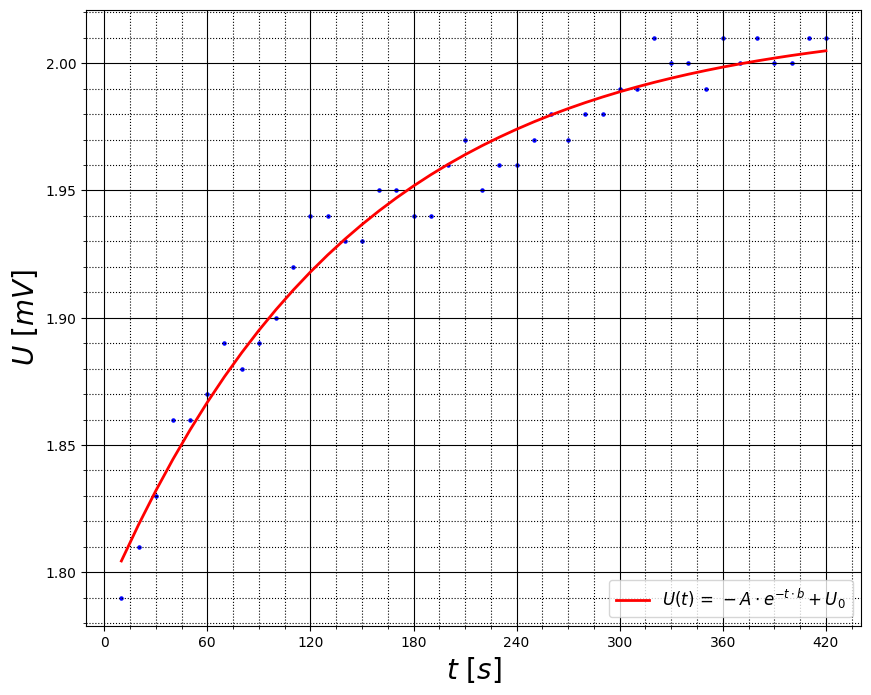

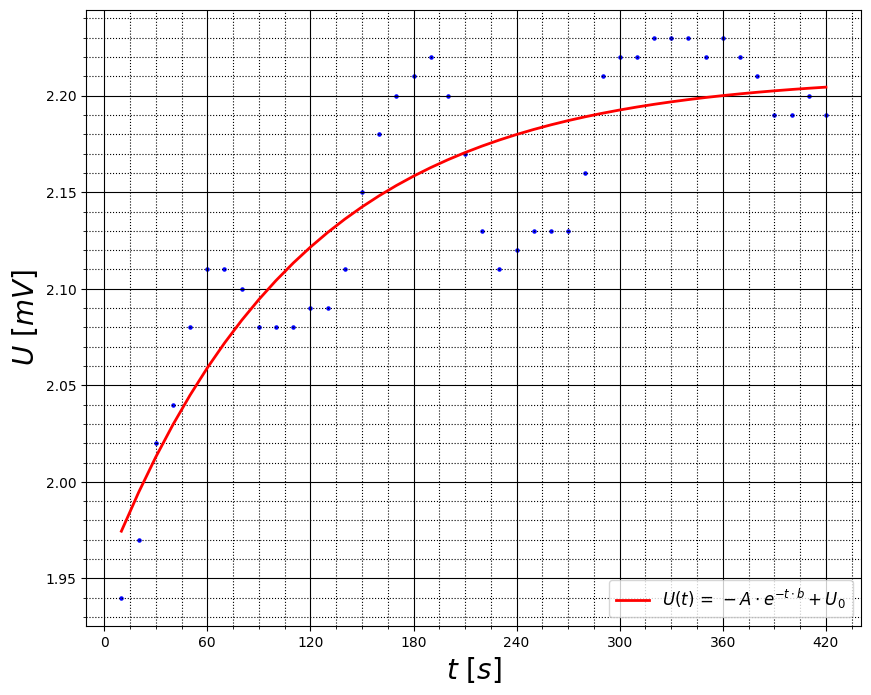

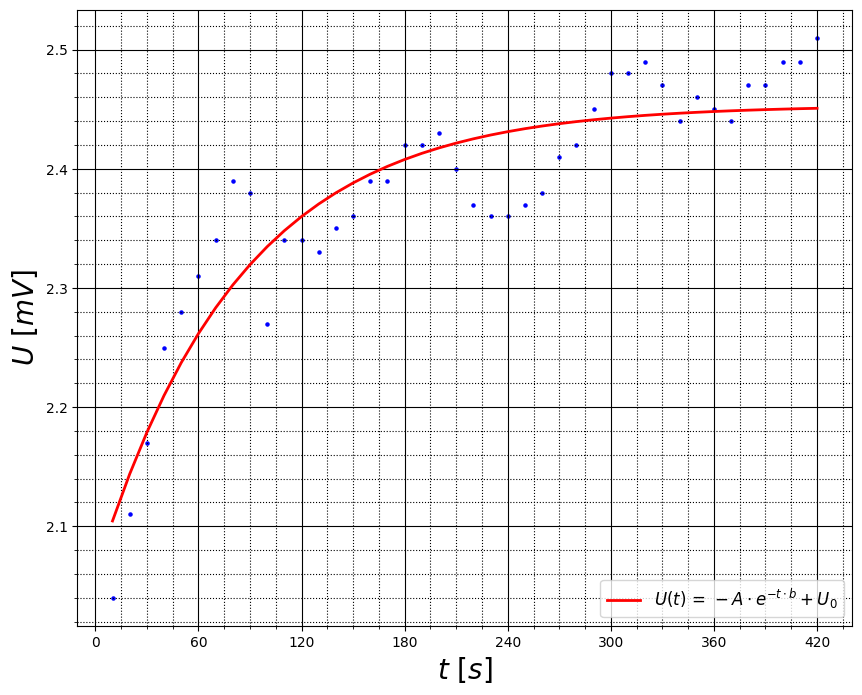

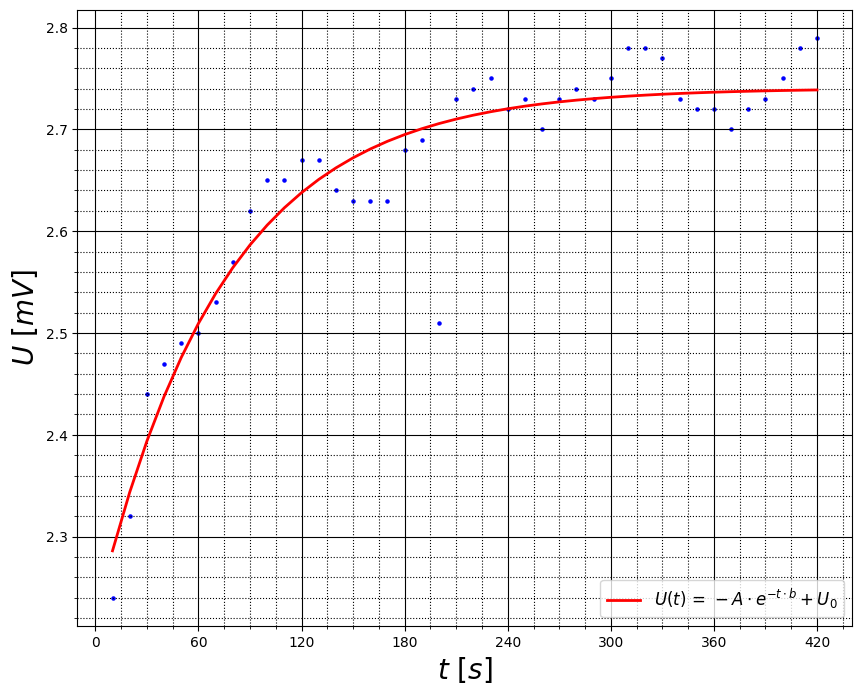

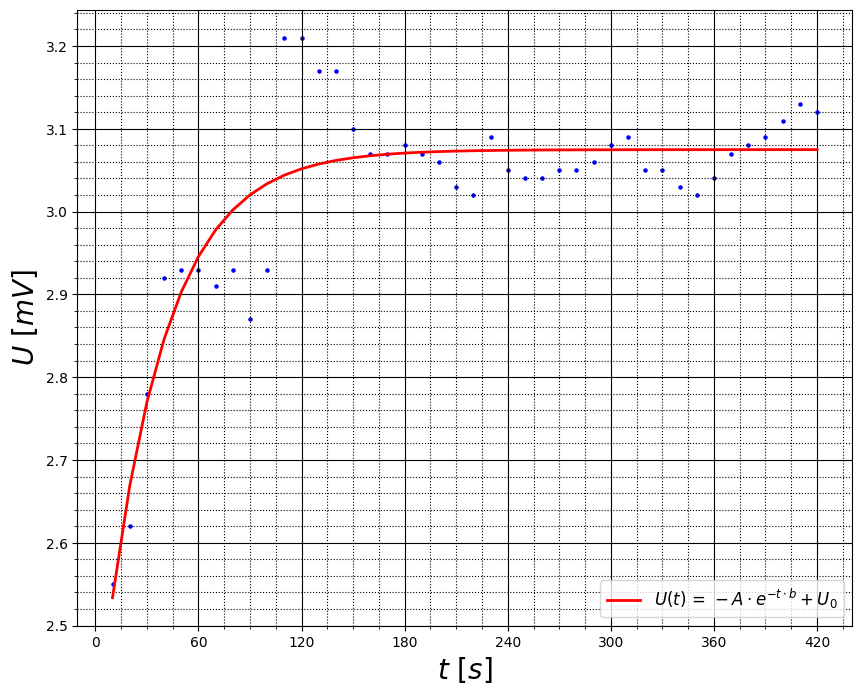

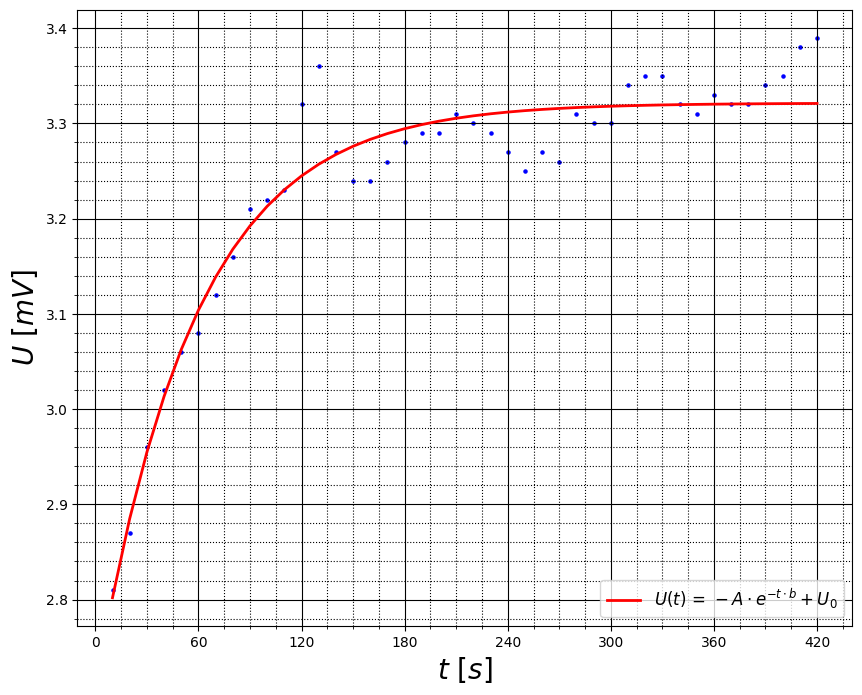

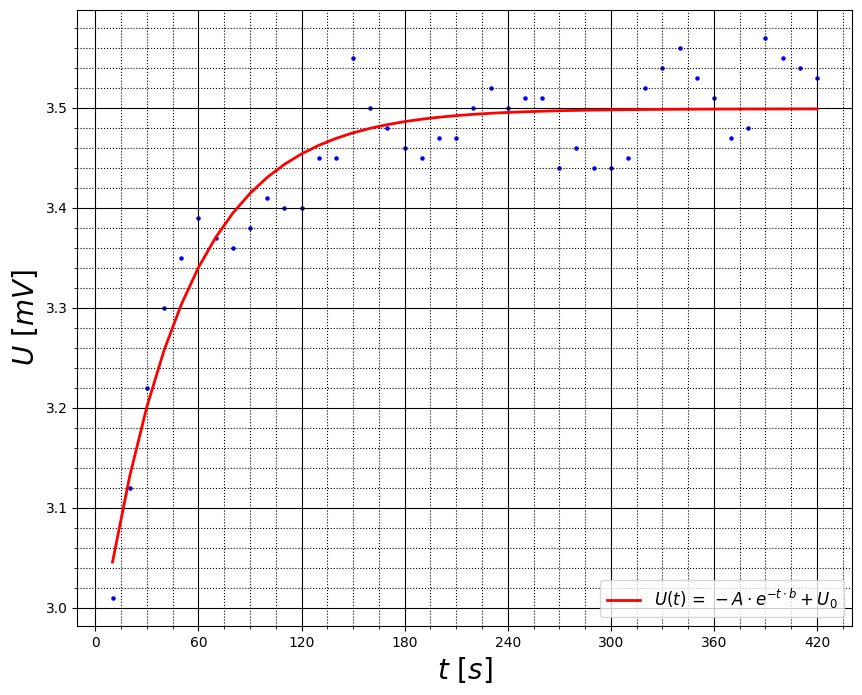

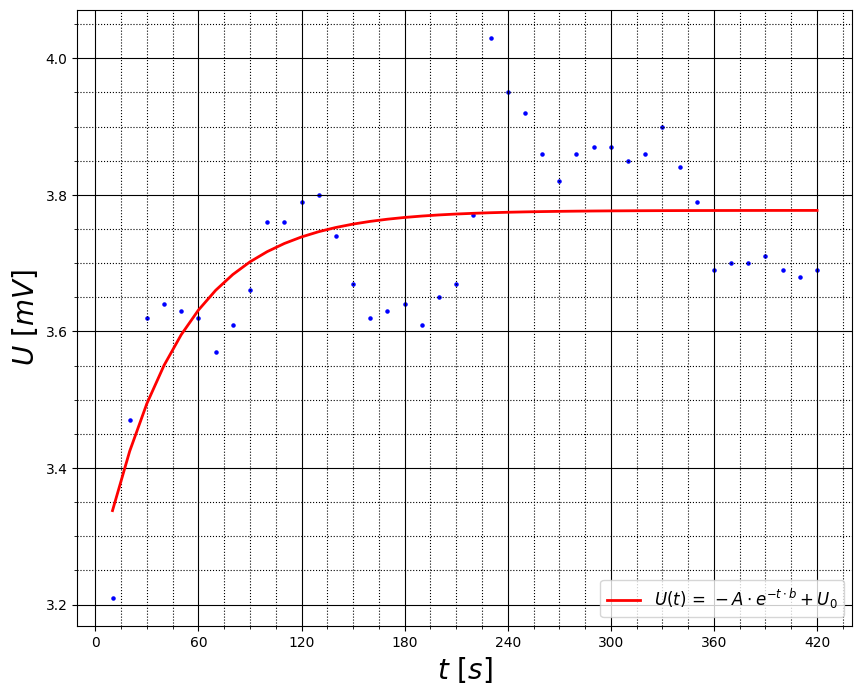

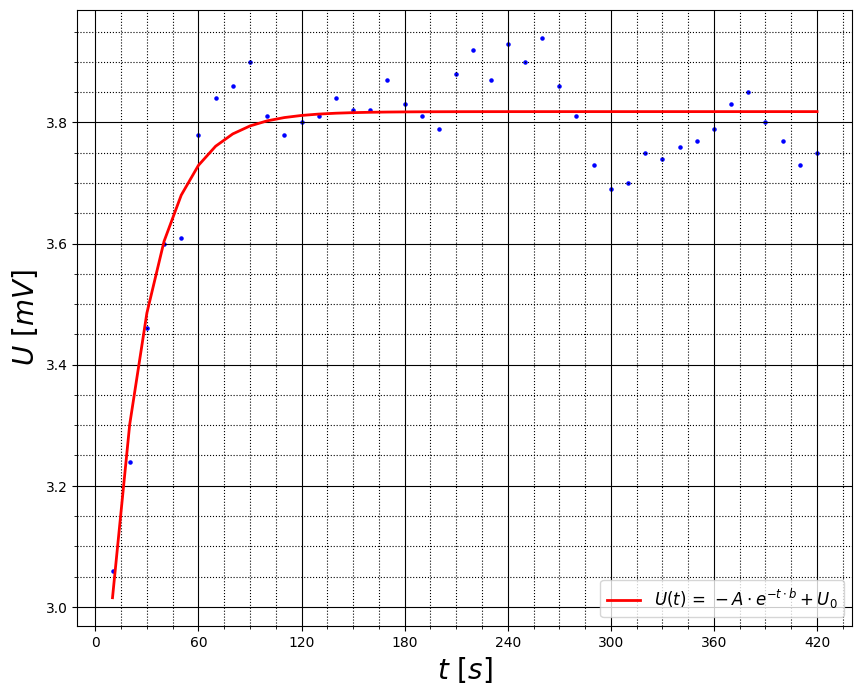

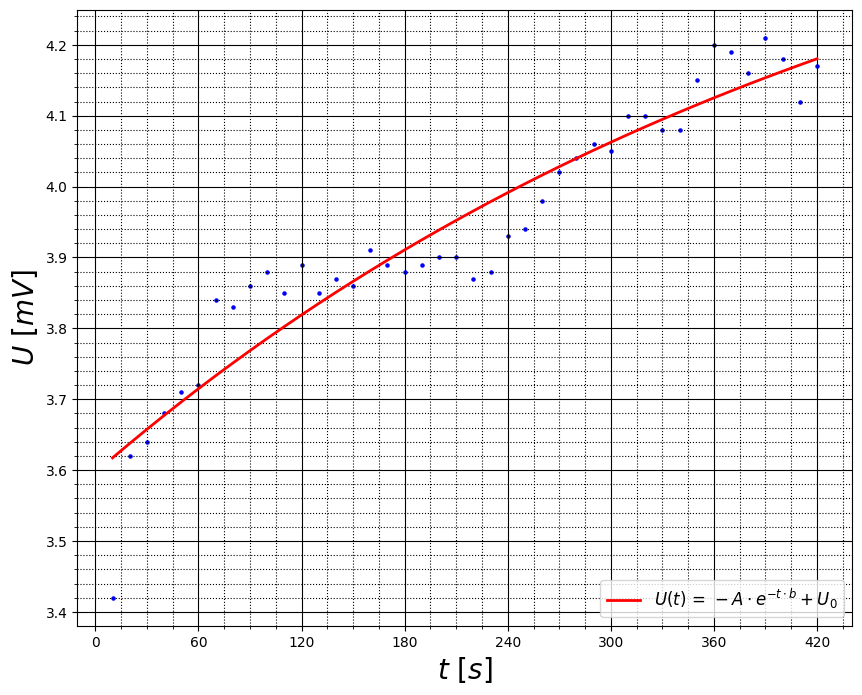

In [17]:


def ead(t,A,b,U):
    return A*-1*np.exp(-t*b)+U

popt_arr = np.array([])

for k in range (len(t_dat)):
    fig, ax = plt.subplots() #a plotolási paramétereim kiszögezése
    fig.set_figheight(8) 
    fig.set_figwidth(10)

    popt, pcov=curve_fit(ead, t_dat[k], U_dat[k],p0=[1, 0.01, U_dat[k][0]])#1000*

    ax.scatter(t_dat[k], U_dat[k],s=5,c='b')#*1000
    ax.plot(t_dat[k], ead(t_dat[k], popt[0],popt[1], popt[2]), c='r', linewidth=2, label=r'$U(t) \,=\, - A \cdot e^{-t \cdot b} + U_0 $')#*1000
    
    ax.set_xlabel(r'$t \,\, [s]$', fontsize=20)
    ax.set_ylabel(r'$U \,\, [mV]$', fontsize=20)
    ax.legend(fontsize=12, loc='lower right')
    #ax.set_title(r'Első rugó statikus terhelése')

    ax.set_xticks(np.arange(0, 420.1, 420/7))
    
    ax.grid( which='major', color='black', linestyle='-')
    ax.minorticks_on()
    ax.grid(which='minor', color='black', linestyle=':')
    
    ax.margins(0.05, 0.05)


    perr=np.sqrt(np.diag(pcov))
    
    popt_arr = np.append(popt_arr, popt) # Paraméter-vektor készítés
    #print(k+1, ".  A, b, U:", popt)
    fig.savefig('U-t-' + str(k+1) + '.pdf', bbox_inches = "tight")

print('\n\n', popt_arr)
popt_mtrx = popt_arr.reshape(-1,3) # Paraméter-mátrix készítés

print('\n\n', popt_mtrx)


In [4]:
T_avrg = np.array([])
T4_avrg = np.array([])
T_err = np.array([])

for i in range(len(T_dat)):
    T_avrg = np.append(T_avrg, np.mean(T_dat[i]))
    T4_avrg = np.append(T4_avrg, T_avrg[i]**4)
    T_err = np.append(T_err, np.std(T_dat[i]))
    
print('\n\n', T_avrg) # Átlaghőmérsékletek Kelvinben
print('\n\n', T4_avrg) # Átlaghőmérsékletek negyedi hatványa Kelvinben
print('\n\n', T_err) # Hőmérsékleti hibák





 [479.15       515.79285714 546.0547619  575.65       606.10238095
 636.5547619  666.62619048 696.10238095 726.57857143 756.43571429]


 [5.27091448e+10 7.07784902e+10 8.89088095e+10 1.09808014e+11
 1.34953440e+11 1.64188632e+11 1.97482897e+11 2.34796964e+11
 2.78695747e+11 3.27407106e+11]


 [1.13686838e-13 1.17151568e+00 1.26884882e+00 1.21987509e+00
 1.43015785e+00 1.27353134e+00 1.43490659e+00 1.30844111e+00
 1.07222193e+00 1.43569652e+00]


In [5]:
(T_avrg[0])**4
print(67.15**4)

20332185.720006257


In [6]:
S = 6
alfa = 40
A = 0.0001

# Adott, irodalmi mennyiségek

sigma = []
U_inf = []

for i in range(len(popt_mtrx)):
    U_inf.append(popt_mtrx[i][2])
    sigma.append((alfa*U_inf[i])/(S*A*T4_avrg[i]))
    
sigma = np.array(sigma)
    
#print('\n\n', sigma) # Stefan-Boltzmann állandók

sigma_avrg = np.average(sigma)
sigma_err = np.std(sigma)

print(U_inf, '\n\n', sigma, '\n\n', sigma_avrg, '\n\n', sigma_err) # Átlag és szórás

[2.0172937838871183, 2.210640729822414, 2.4533381781041257, 2.7404890508920343, 3.0748070190568404, 3.3213817157834464, 3.4989162007651036, 3.7771865080517797, 3.8179506786773088, 4.586861551585882] 

 [2.55147855e-06 2.08221521e-06 1.83959137e-06 1.66380635e-06
 1.51894708e-06 1.34860401e-06 1.18117105e-06 1.07246887e-06
 9.13290023e-07 9.33977193e-07] 

 1.510554969176016e-06 

 5.057615397847886e-07


In [14]:
P=[]

for i in range(len(sigma)):
    P.append(sigma[i]*T4_avrg[i])

P=np.array(P)

print('\n\n', P) # Sugárzási teljesítmények



 [134486.25225914 147376.04865483 163555.87854028 182699.27005947
 204987.13460379 221425.4477189  233261.08005101 251812.43387012
 254530.04524515 305790.77010573]


['a, c']
2.981966185710517 1.7338526738883342
1.9085468652284834 0.09867168091809812
['c']
1.1149992596117965e-06
9.665262210978785e-08


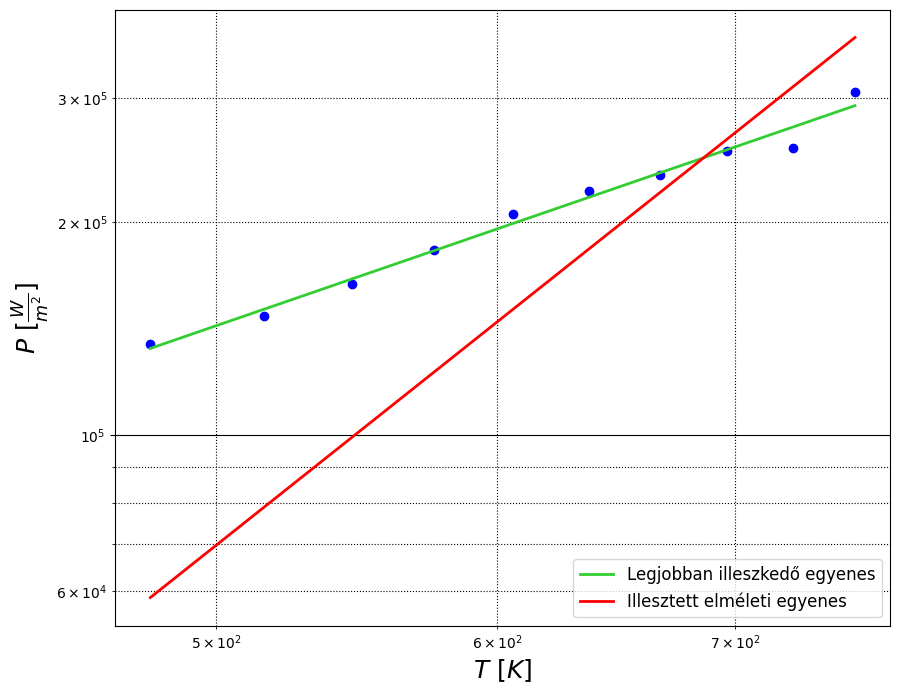

In [16]:
def exponencialis(x,a,c):
    return(a * np.power(x,c))
def exponencialis2(x,c):
    return(c * np.power(x,4))

popt3,pcov3=curve_fit(exponencialis,T_avrg,P)
perr3 = np.sqrt(np.diag(pcov3))

popt4,pcov4=curve_fit(exponencialis2,T_avrg,P)
perr4 = np.sqrt(np.diag(pcov4))



fig, ax = plt.subplots() #a plotolási paramétereim kiszögezése
fig.set_figheight(8) 
fig.set_figwidth(10)


ax.plot(T_avrg, P, "o", color="blue")
ax.plot(T_avrg, exponencialis(T_avrg,*popt3),label='Legjobban illeszkedő egyenes', color='limegreen', linewidth=2)
ax.plot(T_avrg, exponencialis2(T_avrg,*popt4),label='Illesztett elméleti egyenes', color='red', linewidth=2)


ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r"$T \,\, [K]$", fontsize=20)
ax.set_ylabel(r"$P \,\, [\frac{W}{m^2}]$", fontsize=20)
#title(r"A $T-P$ grafikon")
ax.legend(fontsize=12, loc='lower right')

ax.set_xticks(np.arange(0, 420.1, 420/7))
    
ax.grid( which='major', color='black', linestyle='-')
ax.minorticks_on()
ax.grid(which='minor', color='black', linestyle=':')
    
ax.margins(0.05, 0.05)

print (['a, c'])
print (*popt3)
print (*perr3)

print (['c'])
print (*popt4)
print (*perr4)
fig.savefig('touching-lines.pdf', bbox_inches = "tight")